

# Strategy-wise analysis

## Averages across each run per participating team over acceleration, skidpad and autocross events

Importing dependencies and setting up matplotlib plot style

In [220]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker
import csv

plt.style.use("ggplot")

### Define functions

Load data

In [221]:
def load(path: str) -> np.array:
    with open(path) as file:
        reader = csv.reader(file)
        next(reader)

        # Load the 4 runs data and store it in np.array
        ls = []
        for entry in reader:
            # Muliple assignment, casting and changing DNA/DNF into 0
            run1, run2, run3, run4 = entry[3:-2]
            run1 = float(run1) if run1 not in ["DNA", "DNF"] else 0
            run2 = float(run2) if run2 not in ["DNA", "DNF"] else 0
            run3 = float(run3) if run3 not in ["DNA", "DNF"] else 0
            run4 = float(run4) if run4 not in ["DNA", "DNF"] else 0

            # Storing each entry as a structured array for indexing
            arr_entry = np.array(
                (run1, run2, run3, run4),
                dtype=[
                    ("run1", "float64"),
                    ("run2", "float64"),
                    ("run3", "float64"),
                    ("run4", "float64"),
                ],
            )
            ls.append(arr_entry)

        return np.array(ls)

Compute means and DNA/DNF per run

In [222]:
def dna_dnf(arr: np.array, runs: int) -> np.array:
    DNA = np.zeros(runs)

    for i in range(len(DNA)):
        DNA[i] = len(arr[f"run{i+1}"][arr[f"run{i+1}"] == 0])

    return DNA


def mean(arr: np.array, runs: int) -> np.array:
    MEANS = np.zeros(runs)

    for i in range(len(MEANS)):
        MEANS[i] = np.mean(arr[f"run{i+1}"][arr[f"run{i+1}"] != 0])

    return MEANS

Plotting mean times and DNA/DNF per run

In [223]:
def plot(MEAN: np.array, DNA: np.array, teams: int, title: str) -> None:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(title, fontsize=16, y=1.05)

    # Plot means from each run
    X = range(1, 5)
    ax1.bar(X, MEAN)
    ax1.axhline(np.mean(MEAN), ls="--", color="c")

    # Customizing mean plot
    ax1.legend(("avrg", "run"))
    ax1.set_yscale("log")
    ax1.get_yaxis().set_minor_formatter(ticker.ScalarFormatter())
    ax1.set_title("Mean time per run")
    ax1.set_xlabel("Run #")
    ax1.set_ylabel("Seconds (s)")

    # Plot DNA/DNF from each run
    ax2.bar(X, DNA)

    # Customizing DNA/DNF plot
    ax2.set_title("DNA/DNF per run")
    ax2.set_xlabel("Run #")
    ax2.set_ylabel(f"Amount (out of {teams} teams)")

### Aceleration event

Loading teams' data

In [224]:
acc_path = "FSAE_2023_results/FSAE_2023_results - Acceleration event results.csv"
acc_arr = load(acc_path)

Compute mean and DNFs/DNAs from each run and plot them

In [225]:
acc_DNA = dna_dnf(acc_arr, 4)
acc_MEAN = mean(acc_arr, 4)

Plotting means from each run and DNA/DNF amount

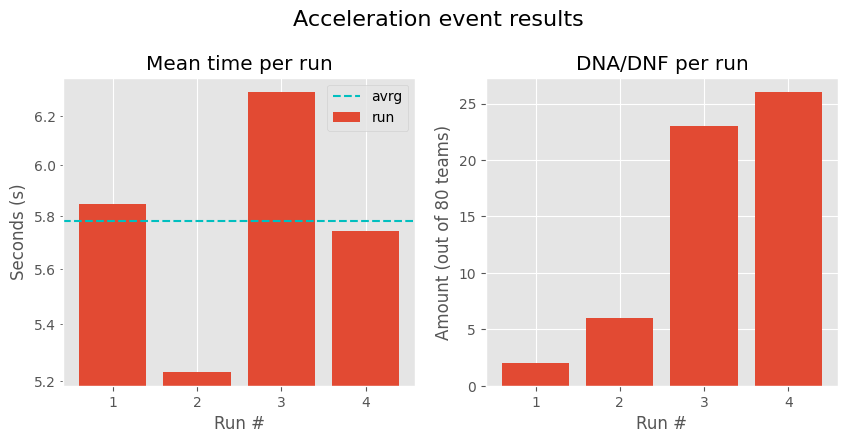

In [226]:
plot(acc_MEAN, acc_DNA, len(acc_arr) - 1, "Acceleration event results")

### Skidpad event

Load event data

In [227]:
skdpd_path = "FSAE_2023_results/FSAE_2023_results - Skidpad event results.csv"
skdpd_arr = load(skdpd_path)

Computing mean and DNA/DNF amount per run

In [228]:
skdpd_DNA = dna_dnf(skdpd_arr, 4)
skdpd_MEANS = mean(skdpd_arr, 4)

Plotting means and DNA/DNF per run

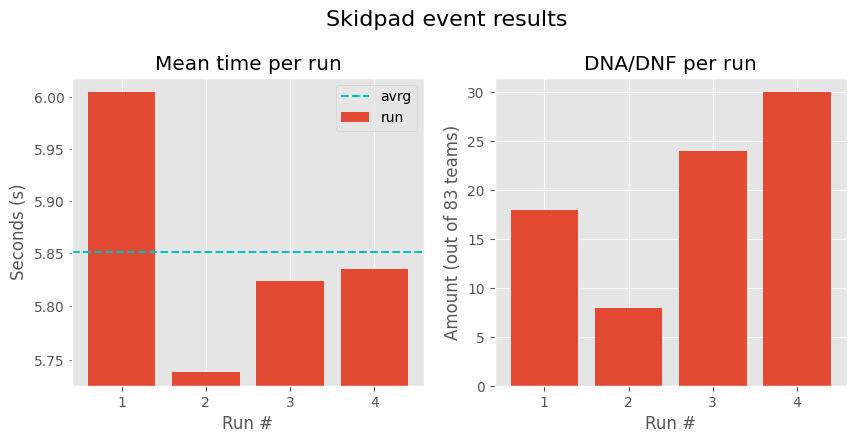

In [229]:
plot(skdpd_MEANS, skdpd_DNA, len(skdpd_arr) - 1, "Skidpad event results")

### Autocross event 

Load data

In [230]:
auto_path = "FSAE_2023_results/FSAE_2023_results - Autocross event results.csv"
auto_arr = load(auto_path)

Compute mean and DNA/DNF from data

In [231]:
auto_DNA = dna_dnf(auto_arr, 4)
auto_MEANS = mean(auto_arr, 4)

Plotting data

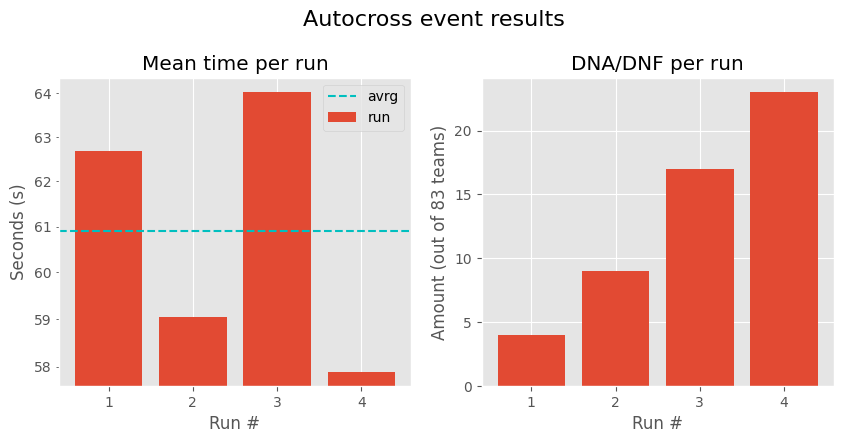

In [232]:
plot(auto_MEANS, auto_DNA, len(auto_arr) - 1, "Autocross event results")